<a href="https://colab.research.google.com/github/BapureddyY/deeplearning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow numpy pandas scikit-learn


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.metrics import AUC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Preprocess data
df1 = pd.read_csv('1.csv')
df2 = pd.read_csv('2.csv')

# Dataset 1
df1 = df1.drop_duplicates().dropna()

# Dataset 2
df2 = df2.drop_duplicates().dropna()

In [23]:
#For Dataset 1
pd.options.mode.chained_assignment = None
selected_features_df1 = df1[['Choose your gender', 'Age', 'What is your course?', 'Your current year of Study', 'What is your CGPA?', 'Marital status']]
predictor_column_df1 = df1['Do you have Depression?']
label_encoder = LabelEncoder()
selected_features_df1['Choose your gender'] = label_encoder.fit_transform(selected_features_df1['Choose your gender'])
selected_features_df1['What is your course?'] = label_encoder.fit_transform(selected_features_df1['What is your course?'])
selected_features_df1['Marital status'] = label_encoder.fit_transform(selected_features_df1['Marital status'])
features_observations_matrix_df1 = selected_features_df1.copy()
features_observations_matrix_df1['PredictorColumn'] = predictor_column_df1
X_train, X_test, y_train, y_test = train_test_split(
    selected_features_df1, predictor_column_df1, test_size=0.2, random_state=42
)
print("Features x Observations Matrix with Predictor Column:")
print(features_observations_matrix_df1)
print("\nAdditional Machine Learning Concepts:")
print(f"Number of Samples: {len(df1)}")
print(f"Number of Features: {len(selected_features_df1.columns)}")
print(f"Number of Unique Classes in the Predictor Column: {len(predictor_column_df1.unique())}")
print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")


Features x Observations Matrix with Predictor Column:
     Choose your gender   Age  What is your course?  \
0                     0  18.0                    17   
1                     1  21.0                    25   
2                     1  19.0                     4   
3                     0  22.0                    33   
4                     1  23.0                    37   
..                  ...   ...                   ...   
96                    0  21.0                     2   
97                    1  18.0                    17   
98                    0  19.0                    38   
99                    0  23.0                    39   
100                   1  20.0                     7   

    Your current year of Study What is your CGPA?  Marital status  \
0                       year 1        3.00 - 3.49               0   
1                       year 2        3.00 - 3.49               0   
2                       Year 1        3.00 - 3.49               0   
3        

In [24]:
#For Dataset 2
pd.options.mode.chained_assignment = None
selected_features_df2 = df2[['Age', 'Course', 'Gender', 'CGPA', 'Stress_Level', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Financial_Stress', 'Extracurricular_Involvement', 'Semester_Credit_Load', 'Residence_Type']]
predictor_column_df2 = df2['Depression_Score']
features_observations_matrix_df2 = selected_features_df2.copy()
features_observations_matrix_df2['PredictorColumn'] = predictor_column_df2
print(features_observations_matrix_df2)

      Age       Course  Gender  CGPA  Stress_Level  Anxiety_Score  \
0      25       Others    Male  3.56             3              2   
1      24  Engineering  Female  2.44             0              0   
2      19     Business  Female  3.74             4              3   
4      18     Business    Male  3.40             3              4   
5      21      Medical  Female  3.35             2              3   
...   ...          ...     ...   ...           ...            ...   
7016   20          Law  Female  3.33             1              1   
7017   20          Law  Female  3.69             3              5   
7018   24      Medical  Female  3.73             3              1   
7019   26       Others    Male  3.65             4              1   
7020   24      Medical    Male  3.65             4              4   

     Sleep_Quality Physical_Activity Diet_Quality Social_Support  \
0             Good          Moderate         Good       Moderate   
1          Average               Lo

In [25]:
pd.options.mode.chained_assignment = None
def preprocess_data(dataset1, dataset2, target_variable):
    merged_dataset = pd.merge(df1, df2, on="Age")
    merged_dataset = merged_dataset.dropna(subset=[target_variable])
    #convert 'What is your CGPA?' to numerical format
    merged_dataset['What is your CGPA?'] = merged_dataset['What is your CGPA?'].apply(
        lambda x: float(x.split(' - ')[0]) + float(x.split(' - ')[1]) / 2 if '-' in x else float(x)
    )

    return merged_dataset

In [26]:
# Encoding and selecting features from dataset 1
label_encoder = LabelEncoder()
df1['Choose your gender'] = label_encoder.fit_transform(df1['Choose your gender'])
df1['What is your course?'] = label_encoder.fit_transform(df1['What is your course?'])
df1['Marital status'] = label_encoder.fit_transform(df1['Marital status'])
df1_features = df1[['Choose your gender', 'Age', 'What is your course?', 'Marital status']]
df1_target = label_encoder.fit_transform(df1['Do you have Depression?'])  # Classification target

# Encoding and selecting features from dataset 2
df2['Course'] = label_encoder.fit_transform(df2['Course'])
df2['Gender'] = label_encoder.fit_transform(df2['Gender'])
df2_features = df2[['Age', 'Course', 'Gender', 'CGPA', 'Depression_Score']]  # Including Depression_Score for merging

# Merge datasets on 'Age'
merged_df = pd.merge(df1, df2, on='Age', suffixes=('_df1', '_df2'))
merged_features = merged_df[['Choose your gender', 'Age', 'What is your course?', 'Marital status', 'Course', 'Gender', 'CGPA']]
merged_target_classification = label_encoder.fit_transform(merged_df['Do you have Depression?'])
merged_target_regression = merged_df['Depression_Score'].values

# Splitting and scaling
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(merged_features, merged_target_classification, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(merged_features, merged_target_regression, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)


** EDA**

In [34]:
sns.set(style="whitegrid")

# Display basic statistics and info about the datasets
print("Dataset 1 Summary:")
print(df1.describe())
print(df1.info())

print("\nDataset 2 Summary:")
print(df2.describe())
print(df2.info())


Dataset 1 Summary:
       Choose your gender        Age  What is your course?  Marital status
count          100.000000  100.00000            100.000000      100.000000
mean             0.250000   20.53000             17.190000        0.160000
std              0.435194    2.49628             14.017086        0.368453
min              0.000000   18.00000              0.000000        0.000000
25%              0.000000   18.00000              4.000000        0.000000
50%              0.000000   19.00000             17.000000        0.000000
75%              0.250000   23.00000             28.000000        0.000000
max              1.000000   24.00000             48.000000        1.000000
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     100 n

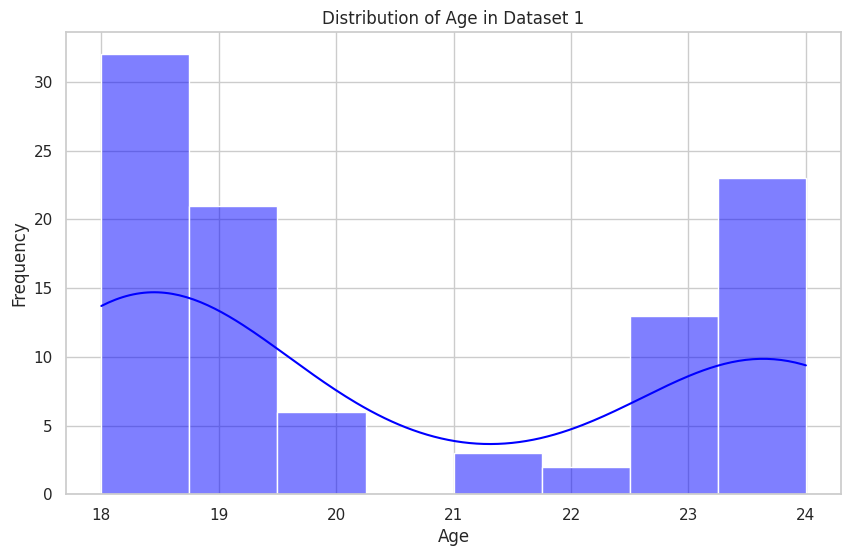

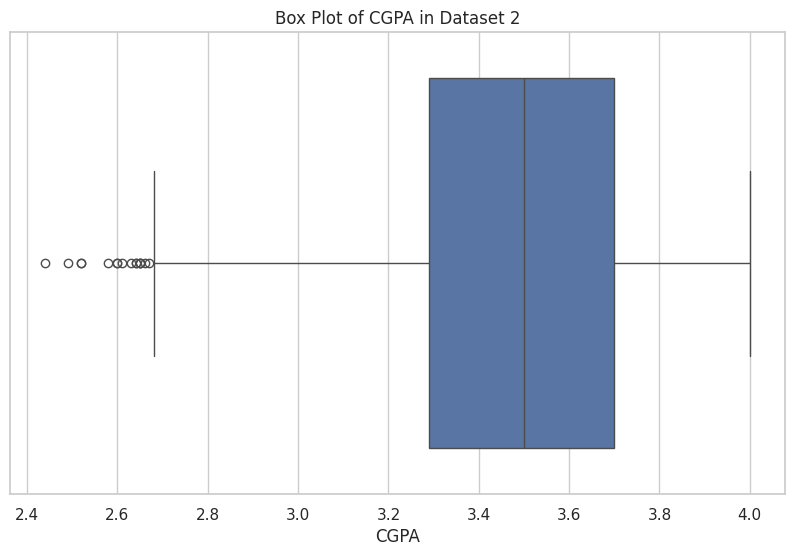

In [35]:
# Histogram for age in df1
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], kde=True, color='blue')
plt.title('Distribution of Age in Dataset 1')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot for CGPA in df2
plt.figure(figsize=(10, 6))
sns.boxplot(x='CGPA', data=df2)
plt.title('Box Plot of CGPA in Dataset 2')
plt.show()


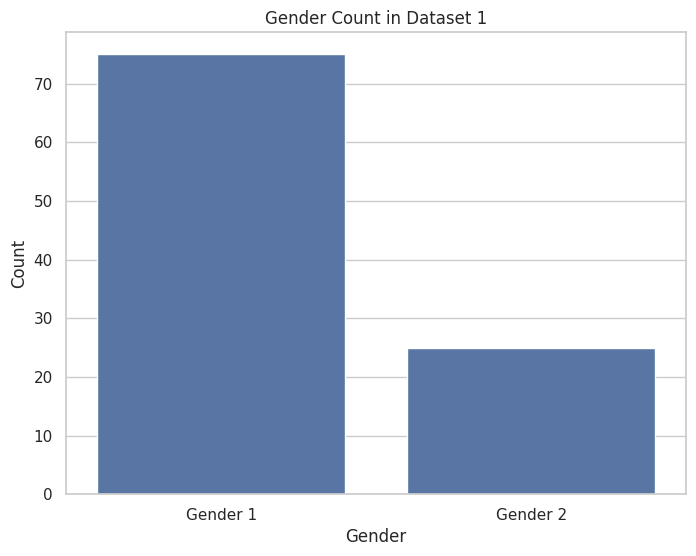

In [44]:
# Assuming 'Choose your gender' is encoded if necessary and '1' and '0' represent different genders
plt.figure(figsize=(8, 6))
sns.countplot(x='Choose your gender', data=df1)
plt.title('Gender Count in Dataset 1')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Gender 1', 'Gender 2'])  # Replace with actual gender labels if known
plt.show()


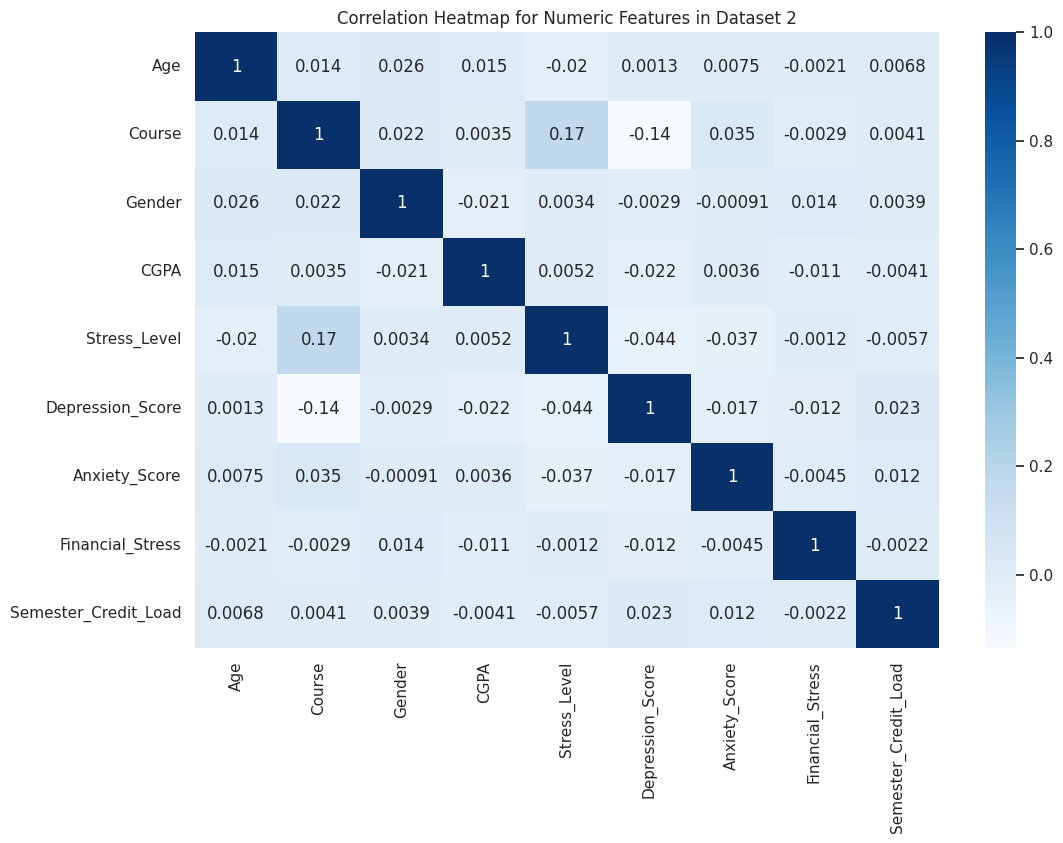

In [45]:
# Calculate correlation matrix for numeric features only
numeric_cols = df2.select_dtypes(include=[np.number]).columns
correlation_matrix = df2[numeric_cols].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap for Numeric Features in Dataset 2')
plt.show()


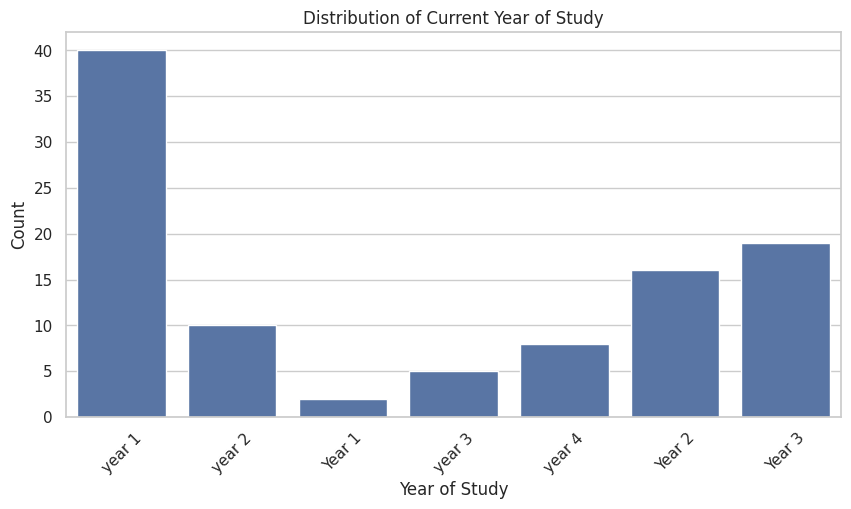

In [47]:
# Count plot for 'Your current year of Study' in df1
plt.figure(figsize=(10, 5))
sns.countplot(data=df1, x='Your current year of Study')
plt.title('Distribution of Current Year of Study')
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


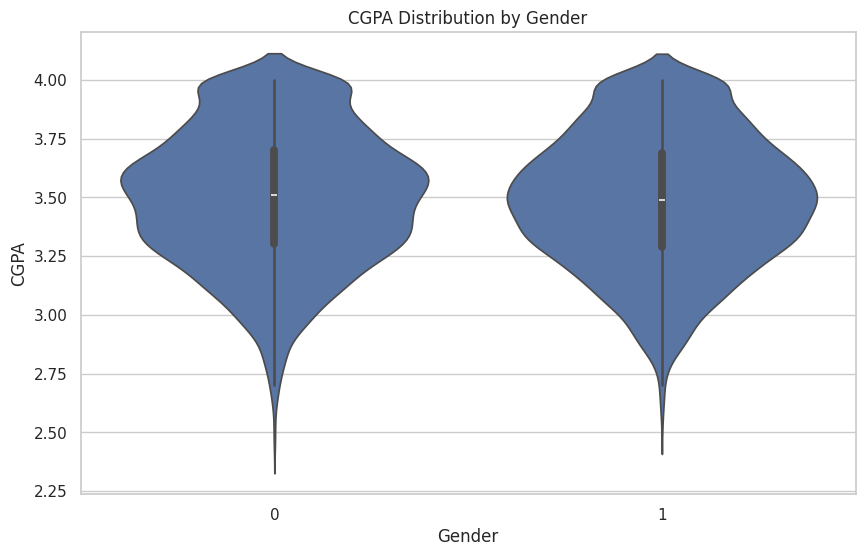

In [49]:
# Violin plot for 'Gender' vs 'CGPA'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='CGPA', data=df2)
plt.title('CGPA Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('CGPA')
plt.show()


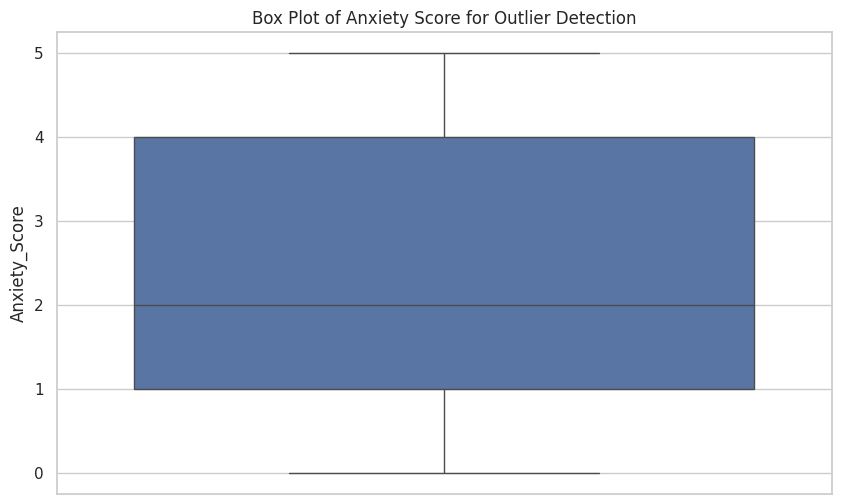

In [50]:
# Assuming 'Anxiety_Score' is a feature in df2
plt.figure(figsize=(10, 6))
sns.boxplot(df2['Anxiety_Score'])
plt.title('Box Plot of Anxiety Score for Outlier Detection')
plt.show()


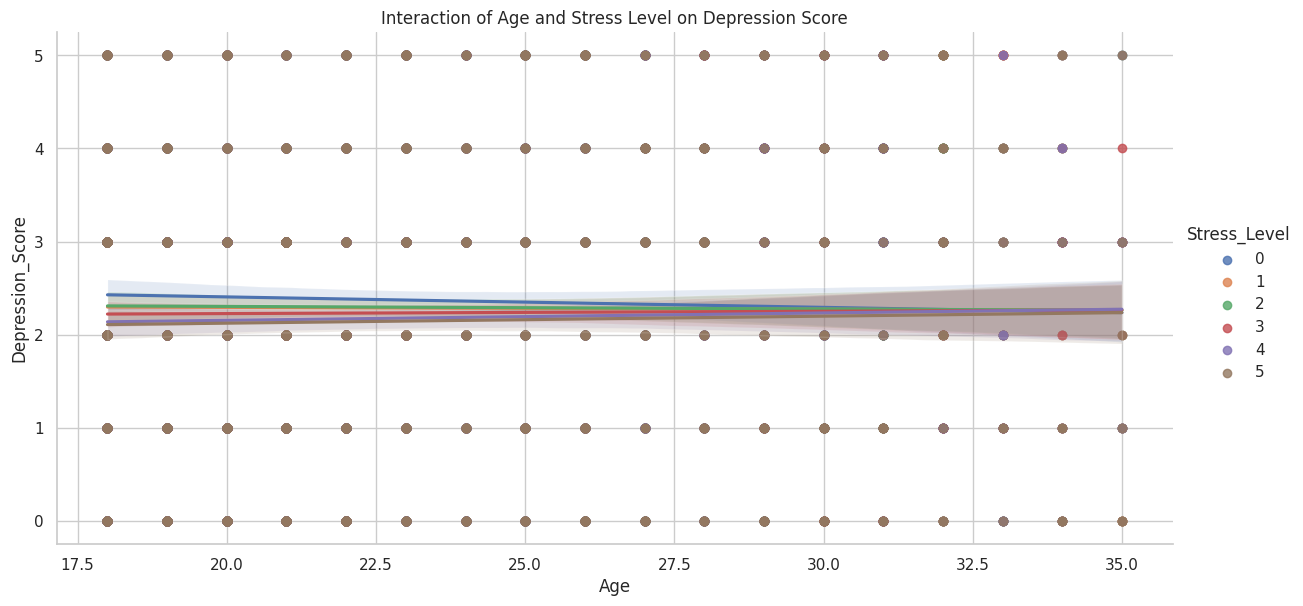

In [51]:
# Interaction effect of 'Age' and 'Stress_Level' on 'Depression_Score'
sns.lmplot(x='Age', y='Depression_Score', hue='Stress_Level', data=df2, aspect=2, height=6)
plt.title('Interaction of Age and Stress Level on Depression Score')
plt.show()


 Baseline Models

In [28]:
#classification
most_frequent_class = np.bincount(y_train_c).argmax()  # Most frequent class in the training data
baseline_pred_c = np.full_like(y_test_c, most_frequent_class)  # Predict this class for all test instances


regression

In [29]:
median_value = np.median(y_train_r)  # Median of training data
baseline_pred_r = np.full_like(y_test_r, median_value)  # Predict this value for all test instances


Evaluate Baseline Models

In [30]:
# Classification Metrics for Baseline
baseline_accuracy = accuracy_score(y_test_c, baseline_pred_c)
baseline_precision = precision_score(y_test_c, baseline_pred_c, zero_division=1)  # Handle division by zero if class imbalance

# Regression Metrics for Baseline
baseline_mse = mean_squared_error(y_test_r, baseline_pred_r)
baseline_mae = mean_absolute_error(y_test_r, baseline_pred_r)

print("Baseline Classification Metrics:")
print(f"Accuracy: {baseline_accuracy:.4f}")
print(f"Precision: {baseline_precision:.4f}")

print("Baseline Regression Metrics:")
print(f"Mean Squared Error: {baseline_mse:.4f}")
print(f"Mean Absolute Error: {baseline_mae:.4f}")


Baseline Classification Metrics:
Accuracy: 0.6458
Precision: 1.0000
Baseline Regression Metrics:
Mean Squared Error: 2.6821
Mean Absolute Error: 1.3552


In [31]:
# Classification Model
model_classification = Sequential([
    Dense(64, activation='relu', input_dim=X_train_c_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Regression Model
model_regression = Sequential([
    Dense(64, activation='relu', input_dim=X_train_r_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])
model_regression.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Training
model_classification.fit(X_train_c_scaled, y_train_c, epochs=50, batch_size=32, validation_split=0.2)
model_regression.fit(X_train_r_scaled, y_train_r, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
1342/1342 [==============================] - 4s 2ms/step - loss: 0.3959 - accuracy: 0.8195 - val_loss: 0.3636 - val_accuracy: 0.8338
Epoch 2/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.3479 - accuracy: 0.8374 - val_loss: 0.3285 - val_accuracy: 0.8540
Epoch 3/50
1342/1342 [==============================] - 3s 2ms/step - loss: 0.3154 - accuracy: 0.8513 - val_loss: 0.2925 - val_accuracy: 0.8688
Epoch 4/50
1342/1342 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.8659 - val_loss: 0.2593 - val_accuracy: 0.8838
Epoch 5/50
1342/1342 [==============================] - 3s 2ms/step - loss: 0.2539 - accuracy: 0.8860 - val_loss: 0.2432 - val_accuracy: 0.8977
Epoch 6/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.2361 - accuracy: 0.8946 - val_loss: 0.2236 - val_accuracy: 0.8965
Epoch 7/50
1342/1342 [==============================] - 3s 2ms/step - loss: 0.2185 - accuracy: 0.9029 - val_loss: 0.2091 - val_accuracy:

In [53]:
# Evaluate the models
loss_c, accuracy_c = model_classification.evaluate(X_test_c_scaled, y_test_c)
loss_r, mae_r = model_regression.evaluate(X_test_r_scaled, y_test_r)

print(f"Classification Accuracy: {accuracy_c:.2f}")
print(f"Regression MAE: {mae_r:.2f}")


420/420 [==============================] - 1s 2ms/step - loss: 2.3217 - mean_absolute_error: 1.2727
Classification Accuracy: 0.95
Regression MAE: 1.27


Evaluating Classification Model:

In [54]:
from tensorflow.keras.metrics import AUC

# Predict classes and probabilities
y_pred_c_prob = model_classification.predict(X_test_c_scaled)
y_pred_c = (y_pred_c_prob > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)
auc = roc_auc_score(y_test_c, y_pred_c_prob)  # Ensure y_pred_c_prob is used here

print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")


420/420 [==============================] - 1s 1ms/step
Classification Metrics:
Accuracy: 0.9508
Precision: 0.9995
Recall: 0.8615
F1 Score: 0.9254
AUC-ROC: 0.9903


Evaluating Regression Model:

In [56]:
# Predict regression values
y_pred_r = model_regression.predict(X_test_r_scaled)

# Calculate metrics
mse = mean_squared_error(y_test_r, y_pred_r)
mae = mean_absolute_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("Regression Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")


420/420 [==============================] - 1s 3ms/step
Regression Metrics:
Mean Squared Error: 2.3217
Mean Absolute Error: 1.2727
R-squared: 0.1099


In [57]:
print("Deep Learning Model vs Baseline Model Performance")
print("\nClassification:")
print(f"Model Accuracy: {accuracy:.4f} vs Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Model Precision: {precision:.4f} vs Baseline Precision: {baseline_precision:.4f}")

print("\nRegression:")
print(f"Model MSE: {mse:.4f} vs Baseline MSE: {baseline_mse:.4f}")
print(f"Model MAE: {mae:.4f} vs Baseline MAE: {baseline_mae:.4f}")


Deep Learning Model vs Baseline Model Performance

Classification:
Model Accuracy: 0.9508 vs Baseline Accuracy: 0.6458
Model Precision: 0.9995 vs Baseline Precision: 1.0000

Regression:
Model MSE: 2.3217 vs Baseline MSE: 2.6821
Model MAE: 1.2727 vs Baseline MAE: 1.3552


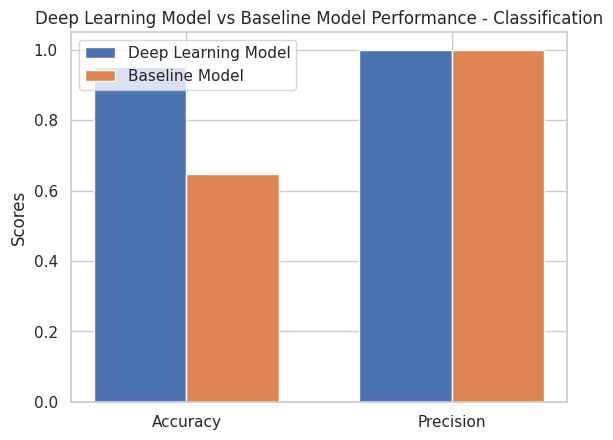

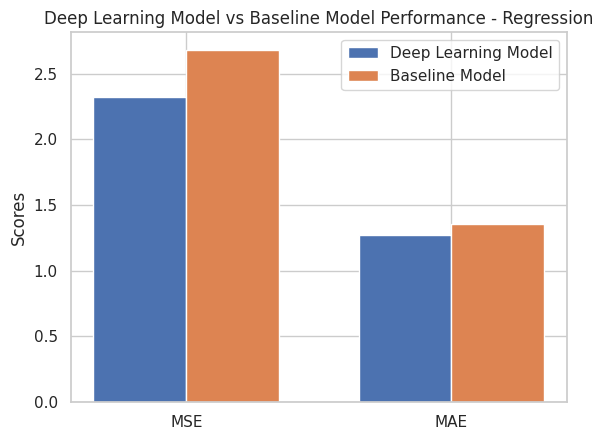

In [58]:
import matplotlib.pyplot as plt

# Data to plot
classification_metrics = ['Accuracy', 'Precision']
classification_values = [accuracy, precision]
baseline_classification_values = [baseline_accuracy, baseline_precision]

regression_metrics = ['MSE', 'MAE']
regression_values = [mse, mae]
baseline_regression_values = [baseline_mse, baseline_mae]

# Bar width
width = 0.35

# Classification Comparison Plot
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(classification_metrics)), classification_values, width, label='Deep Learning Model')
bar2 = ax.bar(np.arange(len(classification_metrics)) + width, baseline_classification_values, width, label='Baseline Model')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Deep Learning Model vs Baseline Model Performance - Classification')
ax.set_xticks(np.arange(len(classification_metrics)) + width / 2)
ax.set_xticklabels(classification_metrics)
ax.legend()

# Regression Comparison Plot
fig, ax1 = plt.subplots()
bar3 = ax1.bar(np.arange(len(regression_metrics)), regression_values, width, label='Deep Learning Model')
bar4 = ax1.bar(np.arange(len(regression_metrics)) + width, baseline_regression_values, width, label='Baseline Model')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Scores')
ax1.set_title('Deep Learning Model vs Baseline Model Performance - Regression')
ax1.set_xticks(np.arange(len(regression_metrics)) + width / 2)
ax1.set_xticklabels(regression_metrics)
ax1.legend()

plt.show()


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('2019.csv')

# Drop non-numeric and non-relevant columns for prediction
data_numeric = data.drop(columns=['Overall rank', 'Country or region'])

# Check the first few rows to understand what's included now
print(data_numeric.head())

# Define X (features) and y (target)
X = data_numeric.drop('Score', axis=1)
y = data_numeric['Score']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


   Score  GDP per capita  Social support  Healthy life expectancy  \
0  7.769           1.340           1.587                    0.986   
1  7.600           1.383           1.573                    0.996   
2  7.554           1.488           1.582                    1.028   
3  7.494           1.380           1.624                    1.026   
4  7.488           1.396           1.522                    0.999   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                         0.596       0.153                      0.393  
1                         0.592       0.252                      0.410  
2                         0.603       0.271                      0.341  
3                         0.591       0.354                      0.118  
4                         0.557       0.322                      0.298  


In [69]:
# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)


Epoch 1/100
7/7 [==============================] - 1s 52ms/step - loss: 27.0019 - mean_absolute_error: 5.0596 - val_loss: 21.3596 - val_mean_absolute_error: 4.4461
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 20.6704 - mean_absolute_error: 4.3388 - val_loss: 16.0770 - val_mean_absolute_error: 3.7461
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 15.1060 - mean_absolute_error: 3.6273 - val_loss: 11.4001 - val_mean_absolute_error: 3.1180
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 10.3682 - mean_absolute_error: 2.9182 - val_loss: 7.6226 - val_mean_absolute_error: 2.5681
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 6.6098 - mean_absolute_error: 2.2669 - val_loss: 4.9383 - val_mean_absolute_error: 2.0566
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 4.0671 - mean_absolute_error: 1.6783 - val_loss: 3.4084 - val_mean_absolute_error: 1.5931
Epoch 7/100
7/7 [====

1/1 [==============================] - 0s 54ms/step - loss: 0.4379 - mean_absolute_error: 0.5355
Test Loss: 0.4379406273365021, Test MAE: 0.5354882478713989


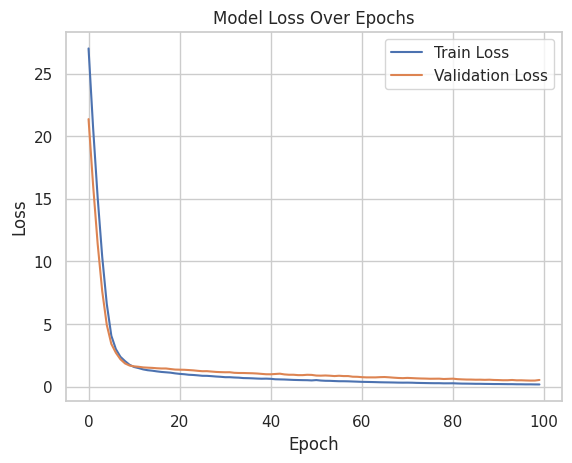

In [70]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Optionally plot the training history for loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [73]:
# Calculate the mean of the target variable from the training set
mean_score = y_train.mean()

# Create predictions for the test set based on the mean
baseline_predictions = np.full(shape=(y_test.shape[0],), fill_value=mean_score)

# Calculate the baseline performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
print(f'Baseline MSE: {baseline_mse}, Baseline MAE: {baseline_mae}')


Baseline MSE: 1.0444315956685744, Baseline MAE: 0.8334128024193548


In [74]:
# Print performance comparison
print(f"Deep Learning Model - Test Loss: {test_loss}, Test MAE: {test_mae}")
print(f"Baseline Model - MSE: {baseline_mse}, MAE: {baseline_mae}")


Deep Learning Model - Test Loss: 0.4379406273365021, Test MAE: 0.5354882478713989
Baseline Model - MSE: 1.0444315956685744, MAE: 0.8334128024193548


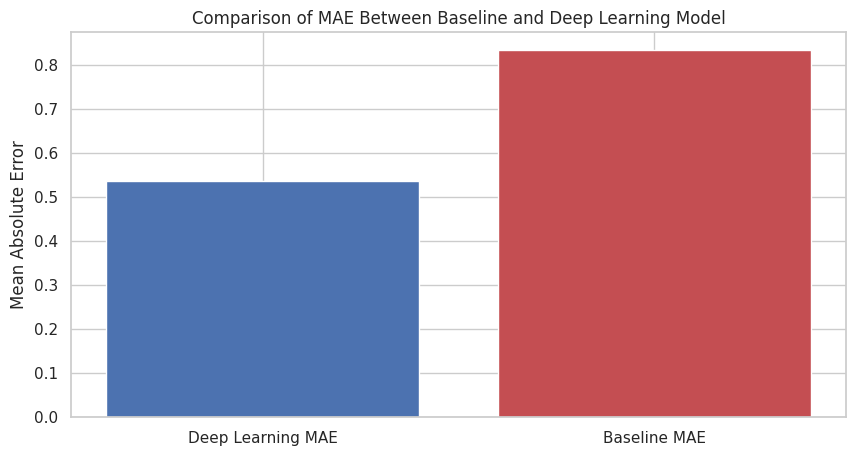

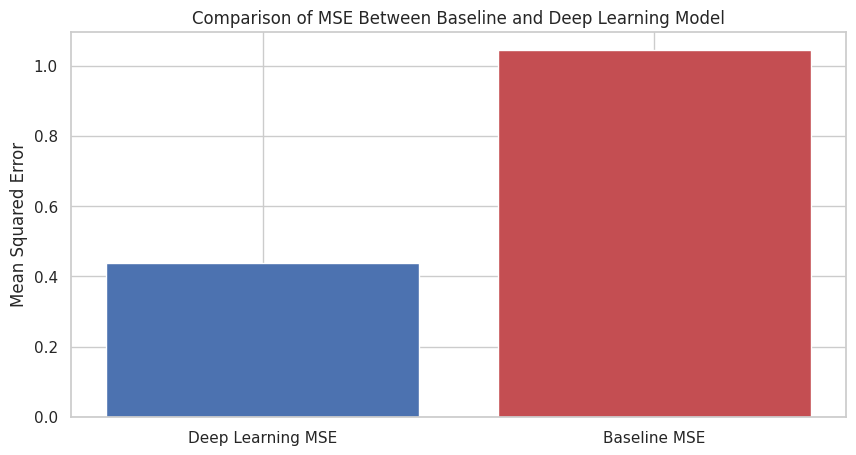

In [75]:
# Plotting the comparison of MAE
plt.figure(figsize=(10, 5))
plt.bar('Deep Learning MAE', test_mae, color='b')
plt.bar('Baseline MAE', baseline_mae, color='r')
plt.title('Comparison of MAE Between Baseline and Deep Learning Model')
plt.ylabel('Mean Absolute Error')
plt.show()

# Plotting the comparison of MSE/Loss
plt.figure(figsize=(10, 5))
plt.bar('Deep Learning MSE', test_loss, color='b')
plt.bar('Baseline MSE', baseline_mse, color='r')
plt.title('Comparison of MSE Between Baseline and Deep Learning Model')
plt.ylabel('Mean Squared Error')
plt.show()
